# Project 1 

## Task 2

### Same as Task 1, but with a magnitude limit of 14

### i) Consider all stars (within 4kpc) and determine the mean value (and dispersion) of
### the retrieved absolute magnitude. Compare with the true absolute magnitude. Are
### there differences?

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_fwf('LK_Task_2.dat', widths = [13, 9, 8, 12, 12, 14, 9, 9, 9], 
               names = ['true parallax (arcsec)', 'true distance (pc)', 'apparent magnitude', 
                        'observed parallax (arcsec)', 'parallax error (arcsec)', 'retrieved distance from observed parallax (pc)',
                        'true absolute magnitude', 'retrieved absolute magnitude', 'photometric error (mag)'
                       ], skiprows = 16)

#print (df)

df_within4kpc = df[
            (df['retrieved distance from observed parallax (pc)'] >= 0) &
            (df['retrieved distance from observed parallax (pc)'] < 4000)
            ]
print (df_within4kpc)



       true parallax (arcsec)  true distance (pc)  apparent magnitude  \
2                    0.000611              1635.8              11.669   
4                    0.000262              3810.1              13.505   
5                    0.000315              3173.0              13.108   
9                    0.000262              3812.0              13.504   
10                   0.000217              4601.1              13.915   
...                       ...                 ...                 ...   
85470                0.000234              4269.2              13.751   
85472                0.000467              2139.8              12.252   
85473                0.001366               732.0               9.922   
85475                0.000230              4353.1              13.795   
85476                0.000290              3448.6              13.288   

       observed parallax (arcsec)  parallax error (arcsec)  \
2                        0.000585                  0.00005   

In [2]:
print ("Mean retrieved absolute magnitude of stars within 4kpc = %#.3g" % df_within4kpc['retrieved absolute magnitude'].mean())
print ("Dispersion of retrieved absolute magnitude of stars within 4kpc = %#.3g" % df_within4kpc['retrieved absolute magnitude'].std())

Mean retrieved absolute magnitude of stars within 4kpc = 0.751
Dispersion of retrieved absolute magnitude of stars within 4kpc = 0.302


In [3]:
print ("Mean true absolute magnitude of stars within 4kpc = %#.3g" % df_within4kpc['true absolute magnitude'].mean())
print ("Dispersion of true absolute magnitude of stars within 4kpc = %#.3g" % df_within4kpc['true absolute magnitude'].std())

Mean true absolute magnitude of stars within 4kpc = 0.600
Dispersion of true absolute magnitude of stars within 4kpc = 0.00104


### ii) Split the sample into different intervals according to the retrieved distance. For example, $R_0$=0-1000, 1001-2000, 2001-3000, 3001- 4000 pc. For each of these intervals determine the mean value (and dispersion) of the retrieved absolute magnitude. Compare with true absolute magnitude. Are there differences? Are there trends with $R_0$?

In [13]:
df_r0_1000 = df[(df['retrieved distance from observed parallax (pc)'] >= 0) & 
                (df['retrieved distance from observed parallax (pc)'] <= 1000)
                ]
df_r1001_2000 = df[(df['retrieved distance from observed parallax (pc)'] > 1000) & 
                   (df['retrieved distance from observed parallax (pc)'] <= 2000)
                  ]
df_r2001_3000 = df[(df['retrieved distance from observed parallax (pc)'] > 2000) & 
                   (df['retrieved distance from observed parallax (pc)'] <= 3000)
                  ]
df_r3001_4000 = df[(df['retrieved distance from observed parallax (pc)'] > 3000)  & 
                   (df['retrieved distance from observed parallax (pc)'] <= 4000)
                  ]

raw_data = {
            'RAM Mean':[
                        df_r0_1000['retrieved absolute magnitude'].mean(), 
                        df_r1001_2000['retrieved absolute magnitude'].mean(),
                        df_r2001_3000['retrieved absolute magnitude'].mean(),
                        df_r3001_4000['retrieved absolute magnitude'].mean()
                       ],
                        
            'RAM Dispersion':[
                        df_r0_1000['retrieved absolute magnitude'].std(),
                        df_r1001_2000['retrieved absolute magnitude'].std(),
                        df_r2001_3000['retrieved absolute magnitude'].std(),
                        df_r3001_4000['retrieved absolute magnitude'].std()
                        ],
    
            'TAM Mean':[      
                        df_r0_1000['true absolute magnitude'].mean(), 
                        df_r1001_2000['true absolute magnitude'].mean(),     
                        df_r2001_3000['true absolute magnitude'].mean(),     
                        df_r3001_4000['true absolute magnitude'].mean()
                        ],
                          
      'TAM Dispersion':[             
                        df_r0_1000['true absolute magnitude'].std(),
                        df_r1001_2000['true absolute magnitude'].std(),
                        df_r2001_3000['true absolute magnitude'].std(),
                        df_r3001_4000['true absolute magnitude'].std()
                        ]
}

df_data = pd.DataFrame(raw_data,
                  index=pd.Index(['0-1000pc', '1001-2000pc', '2001-3000pc', '3001-4000pc'], name='Retrieved Distance'),
                  columns=pd.Index(['RAM Mean', 'RAM Dispersion', 'TAM Mean', 'TAM Dispersion'], name=''))



df_data


,RAM Mean,RAM Dispersion,TAM Mean,TAM Dispersion
Retrieved Distance,,,,
0-1000pc,0.615052,0.085692,0.599961,0.001023
1001-2000pc,0.670009,0.190687,0.599992,0.001048
2001-3000pc,0.780164,0.313344,0.600009,0.001039
3001-4000pc,0.752494,0.312774,0.600005,0.001039


### a) Make a histogram of the true number distribution of stars with distance (from column
### 2 of the file LK.dat) and compare with the histogram of the retrieved distribution of
### stars with distance (from column 6 of the same file). Use a bin size of the order of 200
### pc.

2        1635.8
4        3810.1
5        3173.0
9        3812.0
10       4601.1
          ...  
85470    4269.2
85472    2139.8
85473     732.0
85475    4353.1
85476    3448.6
Name: true distance (pc), Length: 53710, dtype: float64


<Figure size 432x288 with 0 Axes>

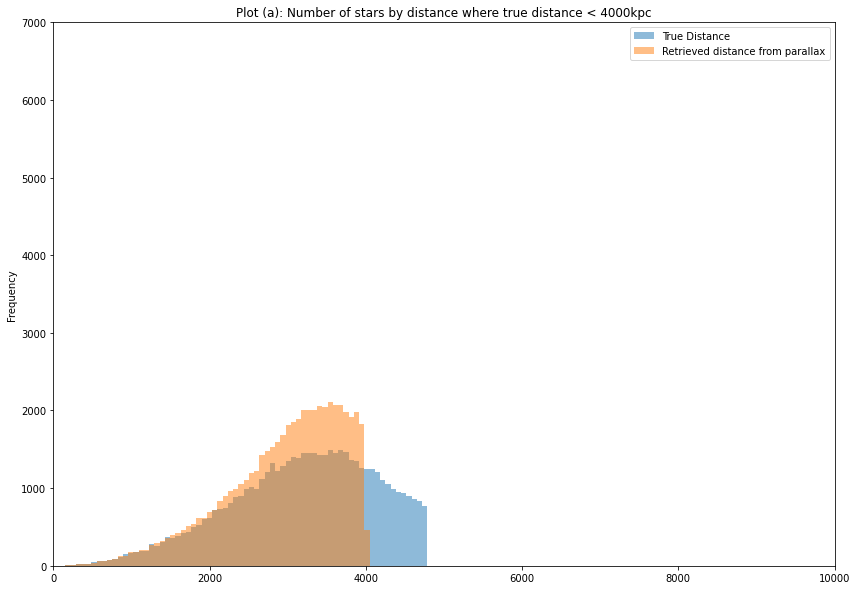

<Figure size 432x288 with 0 Axes>

In [12]:
df_col_2 = df_within4kpc["true distance (pc)"]

df_col_6 = df_within4kpc["retrieved distance from observed parallax (pc)"]

print (df_col_2)
#print(df_within4kpc["true distance (pc)"])

df_hist = pd.DataFrame({'True Distance': df_col_2, 'Retrieved distance from parallax': df_col_6})
#df_hist = pd.DataFrame({'True Distance': (float64)df_within4kpc["true distance (pc)"]})
df_hist.plot(kind='hist', alpha=0.5, bins=70, figsize=(14,10), title="Plot (a): Number of stars by distance where true distance < 4000kpc")
plt.xlim([0,10000])
plt.ylim([0,7000])
plt.figure()

### b) Make a scatter plot of all individuals retrieved absolute magnitudes as a function of
### the retrieved distances (columns 8 and 6 of the file LK.dat).

<Figure size 432x288 with 0 Axes>

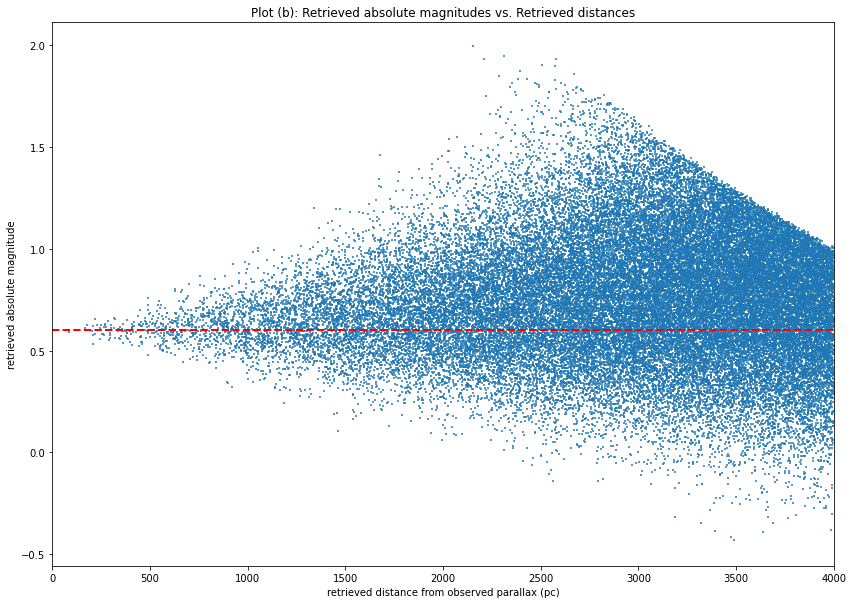

<Figure size 432x288 with 0 Axes>

In [6]:


df_within4kpc.plot.scatter(x='retrieved distance from observed parallax (pc)', y="retrieved absolute magnitude"
                          , figsize=(14,10), marker=(1, 2), title="Plot (b): Retrieved absolute magnitudes vs. Retrieved distances")

plt.axhline(y=0.6, color='r', linestyle='dashed', linewidth=2)
plt.xlim([0,4000])
plt.figure()


### c) Plot histograms of the distribution of the retrieved absolute magnitudes for the four
### retrieved distance intervals at point ii).

<Figure size 432x288 with 0 Axes>

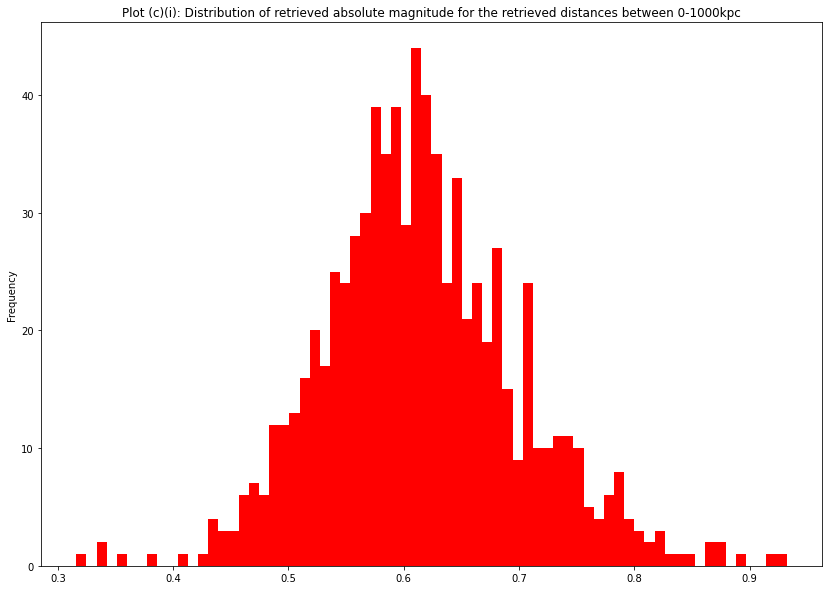

<Figure size 432x288 with 0 Axes>

In [7]:
df_r0_1000['retrieved absolute magnitude'].plot(kind='hist', bins=70, figsize=(14,10), color='red',
                title="Plot (c)(i): Distribution of retrieved absolute magnitude for the retrieved distances between 0-1000kpc")

plt.figure()



<Figure size 432x288 with 0 Axes>

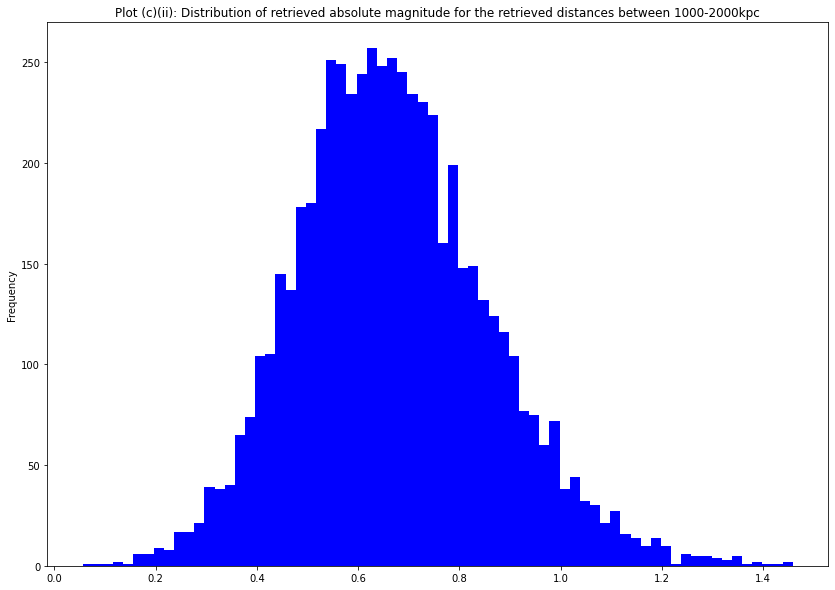

<Figure size 432x288 with 0 Axes>

In [8]:
df_r1001_2000['retrieved absolute magnitude'].plot(kind='hist', bins=70, figsize=(14,10), color='blue', 
                title="Plot (c)(ii): Distribution of retrieved absolute magnitude for the retrieved distances between 1000-2000kpc")
plt.figure()


<Figure size 432x288 with 0 Axes>

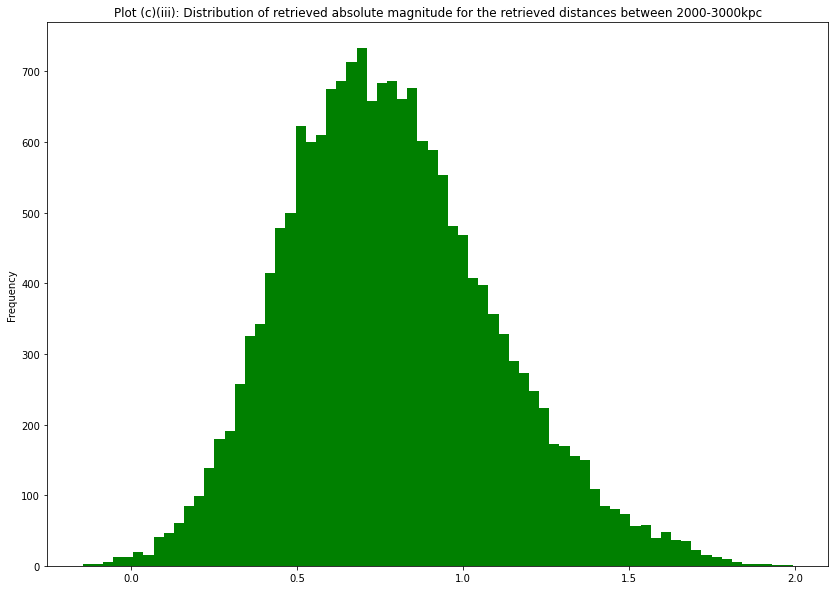

<Figure size 432x288 with 0 Axes>

In [9]:

df_r2001_3000['retrieved absolute magnitude'].plot(kind='hist', bins=70, figsize=(14,10), color='green', 
                title="Plot (c)(iii): Distribution of retrieved absolute magnitude for the retrieved distances between 2000-3000kpc")
plt.figure()



<Figure size 432x288 with 0 Axes>

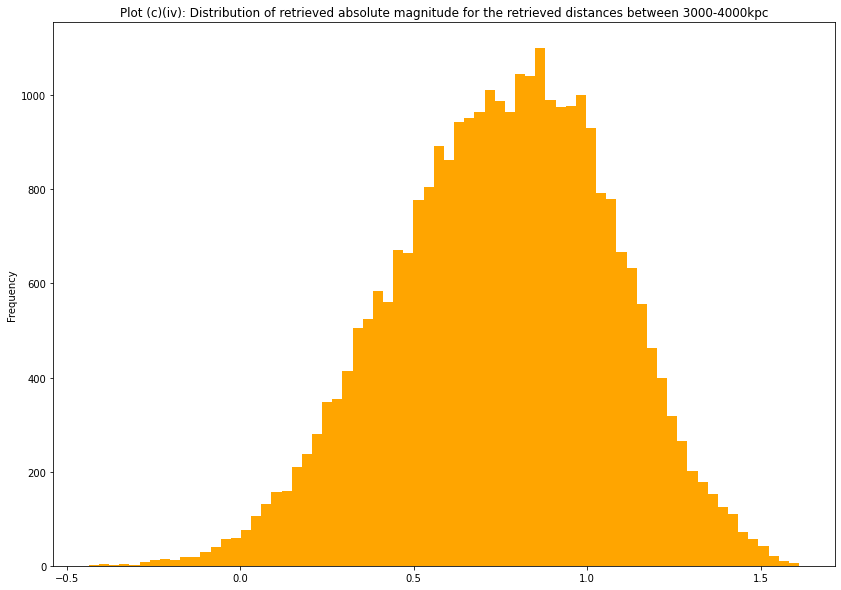

<Figure size 432x288 with 0 Axes>

In [10]:
df_r3001_4000['retrieved absolute magnitude'].plot(kind='hist', bins=70, figsize=(14,10), color='orange',
                title="Plot (c)(iv): Distribution of retrieved absolute magnitude for the retrieved distances between 3000-4000kpc")
plt.figure()

#df_r1001_2000_ram = df[(df['retrieved distance from observed parallax (pc)'] > 1000) & (df['retrieved distance from observed parallax (pc)'] <= 2000)]
#df_r2001_3000_ram = df[(df['retrieved distance from observed parallax (pc)'] > 2000) & (df['retrieved distance from observed parallax (pc)'] <= 3000)]
#df_r3001_4000_ram  = df[(df['retrieved distance from observed parallax (pc)'] > 3000)  & (df['retrieved distance from observed parallax (pc)'] <= 4000)]


<Figure size 432x288 with 0 Axes>

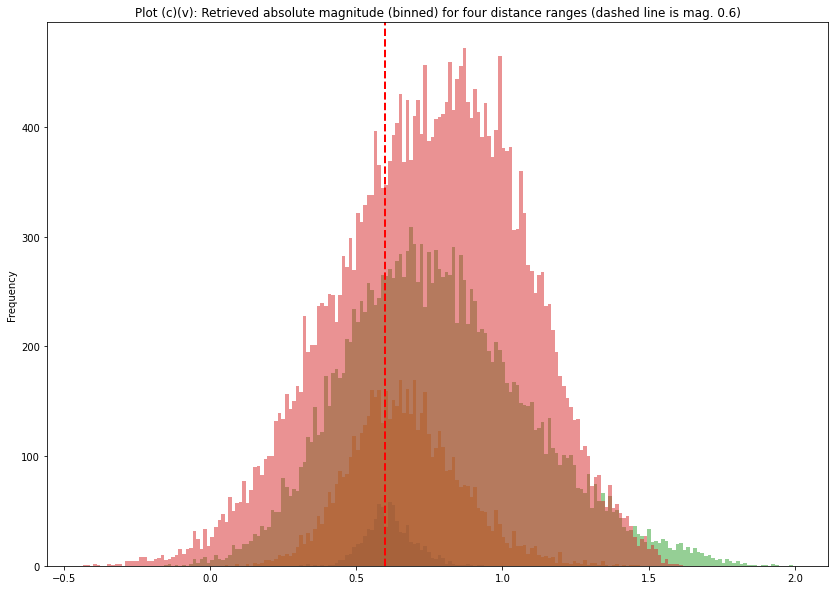

<Figure size 432x288 with 0 Axes>

In [11]:
df_hist = pd.DataFrame({
                        'Ret. Abs. Mag (0pc-1kpc)': df_r0_1000['retrieved absolute magnitude'], 
                        'Ret. Abs. Mag (1kpc-2kpc)': df_r1001_2000['retrieved absolute magnitude'], 
                        'Ret. Abs. Mag (2kpc-3kpc)': df_r2001_3000['retrieved absolute magnitude'],
                        'Ret. Abs. Mag (3kpc-4kpc)': df_r3001_4000['retrieved absolute magnitude'] 
                       })
df_hist.plot(kind='hist', alpha=0.5, bins=200, figsize=(14,10), legend=None, 
             title="Plot (c)(v): Retrieved absolute magnitude (binned) for four distance ranges (dashed line is mag. 0.6)")
plt.axvline(x=0.6, color='r', linestyle='dashed', linewidth=2)
#plt.xlim([0,10000])
#plt.ylim([0,7000])
plt.figure()